In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
sliceSize = 10000

Load CSV

In [9]:
data = pd.read_csv('PreprocessedData/DivertData.csv') # (14312455, 11)
data = data[:sliceSize].merge(data[-sliceSize:],how='outer')    # (2*sliceSize, 11)

Extract day of the week from the date fields

In [10]:
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' +
                              data['Month'].astype(str) + '-' +
                              data['DayofMonth'].astype(str))
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [11]:
coeff = {}

In [12]:
print('2006')
# Prepare features and target variable
X = data[['Year', 'DayOfWeek', 'UniqueCarrier', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Origin_lat', 'Dest_lat', 'Origin_lon', 'Dest_lon']]
Y = data[['Year', 'Diverted']]

2006


In [13]:
X1 = X[X['Year'] == 2006].drop(columns=['Year'])
X1 = pd.get_dummies(X1, columns=['UniqueCarrier'])
Y1 = Y[Y['Year'] == 2006].drop(columns=['Year'])

C:\Users\arith\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arith\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


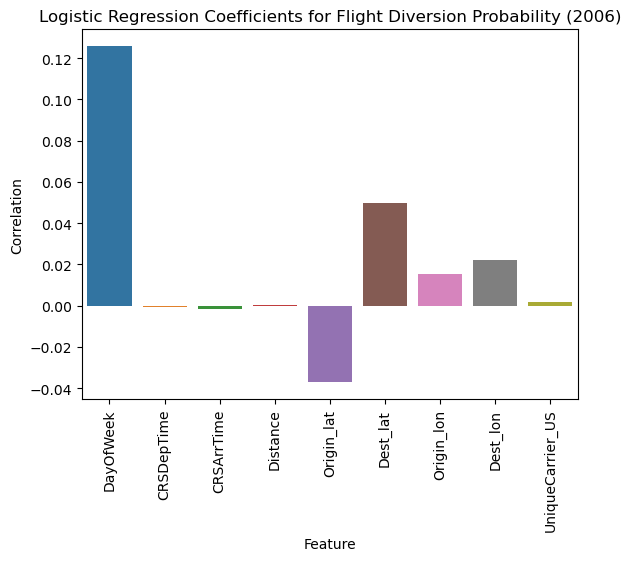

In [14]:
model = LogisticRegression()
model.fit(X1, Y1)
coeff['2006'] = pd.DataFrame( model.coef_[0], index=X1.columns )
sns.barplot(coeff['2006'].T)
plt.title('Logistic Regression Coefficients for Flight Diversion Probability (2006)')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [15]:
print('2007')
# Prepare features and target variable
X = data[['Year', 'DayOfWeek', 'UniqueCarrier', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Origin_lat', 'Dest_lat', 'Origin_lon', 'Dest_lon']]
Y = data[['Year', 'Diverted']]

2007


In [16]:
X1 = X[X['Year'] == 2007].drop(columns=['Year'])
X1 = pd.get_dummies(X1, columns=['UniqueCarrier'])
Y1 = Y[Y['Year'] == 2007].drop(columns=['Year'])

C:\Users\arith\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arith\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


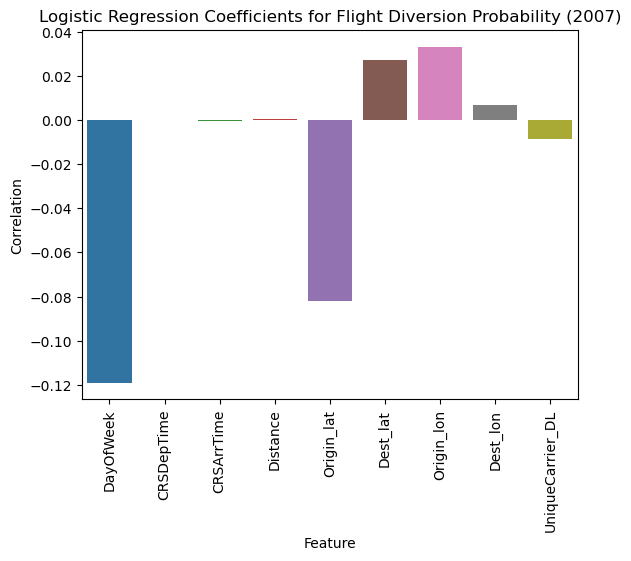

In [17]:
model = LogisticRegression()
model.fit(X1, Y1)
coeff['2007'] = pd.DataFrame( model.coef_[0], index=X1.columns )
sns.barplot(coeff['2007'].T)
plt.title('Logistic Regression Coefficients for Flight Diversion Probability (2007)')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()